### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.linear_model import Lasso

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("ht_user_metrics_pca_lab.csv")

In [3]:
df

,min_resting_heartrate,avg_resting_heartrate,max_resting_heartrate,min_active_heartrate,avg_active_heartrate,max_active_heartrate,min_bmi,avg_bmi,max_bmi,min_vo2,avg_vo2,max_vo2,min_workout_minutes,avg_workout_minutes,max_workout_minutes,min_steps,avg_steps,max_steps,as_x_aah,bmi_change,steps_change,workout_minutes_change,var_workout_minutes,var_steps,lifestyle
0,100.121903,82.683797,99.138281,120.307791,139.434875,162.347827,19.530816,22.398064,24.997081,20.283341,20.994012,21.491176,1.046930,5.502632,9.325750,2539,5171.495890,7837,7.210869e+05,5.466266,5298,8.278820,1.904237,6.279071e+05,Sedentary
1,52.712876,77.732942,97.937731,109.049386,127.057153,146.869868,22.635269,25.150813,27.933614,24.929151,25.527475,26.231702,12.109056,37.216702,66.115919,10027,7115.591781,9611,9.040868e+05,5.298346,-416,54.006862,82.918618,1.316762e+06,Weight Trainer
2,100.373661,86.511629,99.789336,129.551728,147.315731,177.783150,16.844741,19.148256,21.339665,18.817131,19.448407,19.946847,10.524606,45.000087,84.725056,10822,7257.693151,9909,1.069172e+06,4.494924,-913,74.200450,137.295072,1.336600e+06,Weight Trainer
3,58.418806,77.550541,98.875329,110.845517,129.577004,146.738650,21.335820,24.240376,26.909150,20.705860,21.401302,22.088526,11.402530,37.886069,68.119525,10014,7129.690411,9864,9.238439e+05,5.573329,-150,56.716994,90.699736,1.212805e+06,Weight Trainer
4,49.816891,68.933106,92.686789,116.688942,136.502687,162.363830,27.486036,30.726596,33.872173,28.102425,28.855230,29.765288,11.659989,32.241984,60.513742,10317,6958.378082,9766,9.498373e+05,6.386137,-551,48.853753,70.656332,1.095015e+06,Weight Trainer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,100.477154,82.056086,98.814556,122.210337,140.614679,164.254190,18.916956,21.432227,23.856435,23.440035,24.162064,24.938936,10.368677,41.550757,77.061639,10032,7283.430137,9987,1.024157e+06,4.939479,-45,66.692962,105.680187,1.314433e+06,Weight Trainer
2996,100.020278,90.113362,99.805027,118.006237,144.578567,164.659186,18.877848,21.432304,24.417927,17.709768,18.346046,18.941193,11.256013,40.459149,71.493511,10028,7110.720548,9670,1.028058e+06,5.540079,-358,60.237497,96.136487,1.156895e+06,Weight Trainer
2997,102.149087,81.907737,99.971408,129.293432,148.378812,168.128115,19.169454,21.598411,24.616552,21.939059,22.797690,23.523448,1.998609,5.838148,9.966548,2351,5153.890411,7431,7.647281e+05,5.447098,5080,7.967938,2.021952,5.640107e+05,Sedentary
2998,53.335093,69.910868,91.672607,114.039369,140.814891,159.875604,22.352269,26.134180,29.000842,26.250604,26.965661,27.625202,1.353740,5.176265,9.120217,3212,5167.194521,7199,7.276179e+05,6.648573,3987,7.766478,1.650549,5.608619e+05,Sedentary


In [4]:
df.loc[df.sample(frac=0.18, random_state=0).index, 'min_active_heartrate'] = np.nan
df.loc[df.sample(frac=0.05, random_state=0).index, 'min_steps'] = np.nan

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   min_resting_heartrate   3000 non-null   float64
 1   avg_resting_heartrate   3000 non-null   float64
 2   max_resting_heartrate   3000 non-null   float64
 3   min_active_heartrate    2460 non-null   float64
 4   avg_active_heartrate    3000 non-null   float64
 5   max_active_heartrate    3000 non-null   float64
 6   min_bmi                 3000 non-null   float64
 7   avg_bmi                 3000 non-null   float64
 8   max_bmi                 3000 non-null   float64
 9   min_vo2                 3000 non-null   float64
 10  avg_vo2                 3000 non-null   float64
 11  max_vo2                 3000 non-null   float64
 12  min_workout_minutes     3000 non-null   float64
 13  avg_workout_minutes     3000 non-null   float64
 14  max_workout_minutes     3000 non-null   

In [6]:
df.describe(include='all')

,min_resting_heartrate,avg_resting_heartrate,max_resting_heartrate,min_active_heartrate,avg_active_heartrate,max_active_heartrate,min_bmi,avg_bmi,max_bmi,min_vo2,avg_vo2,max_vo2,min_workout_minutes,avg_workout_minutes,max_workout_minutes,min_steps,avg_steps,max_steps,as_x_aah,bmi_change,steps_change,workout_minutes_change,var_workout_minutes,var_steps,lifestyle
count,3000.000000,3000.000000,3000.000000,2460.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2850.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cardio Enthusiast
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1064
mean,46.596007,62.266620,81.759595,107.143115,119.975708,124.820551,20.216641,22.902468,25.581960,31.400286,32.351569,33.306444,3.719636,35.573140,51.482366,9123.932982,10211.991552,9682.893333,1.183951e+06,5.365319,565.604000,47.762730,327.252425,7.327809e+06,NaN
std,23.197686,12.521525,10.741424,10.633606,16.910238,29.117410,3.981621,4.492680,5.048271,6.822672,7.029757,7.237085,7.979517,12.472619,40.759986,2388.932384,2985.154675,766.321373,2.504036e+05,1.185304,1751.884316,41.515634,327.280724,5.577065e+06,NaN
min,18.701942,45.046490,63.809288,61.301991,82.041834,88.747363,6.712313,7.592313,8.513960,10.635041,10.934276,11.309502,0.000000,4.219295,6.337766,2019.000000,5047.646575,6875.000000,5.750503e+05,-0.632658,-1852.000000,-19.693738,1.179231,5.055175e+05,NaN
25%,31.861697,52.024483,72.747027,100.066732,106.580546,99.898870,17.402321,19.761279,22.065341,26.543645,27.334516,28.166052,0.000000,32.626821,9.725078,10004.000000,7181.889726,9896.000000,9.754719e+05,4.551623,-109.250000,9.516259,97.481782,1.263920e+06,NaN
50%,37.915965,58.526237,79.120777,100.677606,117.846432,99.989749,20.243699,22.912607,25.545783,32.203167,33.212109,34.198287,0.000000,36.840635,62.442343,10019.000000,10839.997260,9967.000000,1.241835e+06,5.319163,-47.000000,49.503758,214.351936,7.777858e+06,NaN
75%,49.929328,70.799247,91.164151,112.096551,131.758270,152.454917,22.938567,26.005915,29.121269,36.299501,37.412472,38.506279,10.102802,41.755371,96.767177,10052.000000,12759.914380,9988.000000,1.364699e+06,6.152671,-18.000000,96.509760,483.579588,1.120000e+07,NaN


In [7]:
df.shape

(3000, 25)

In [8]:
df.columns

Index(['min_resting_heartrate', 'avg_resting_heartrate', 'max_resting_heartrate', 'min_active_heartrate', 'avg_active_heartrate', 'max_active_heartrate', 'min_bmi', 'avg_bmi', 'max_bmi', 'min_vo2', 'avg_vo2', 'max_vo2', 'min_workout_minutes', 'avg_workout_minutes', 'max_workout_minutes', 'min_steps', 'avg_steps', 'max_steps', 'as_x_aah', 'bmi_change', 'steps_change', 'workout_minutes_change', 'var_workout_minutes', 'var_steps', 'lifestyle'], dtype='object')

### Data Visualization

### Univariate Data Exploration

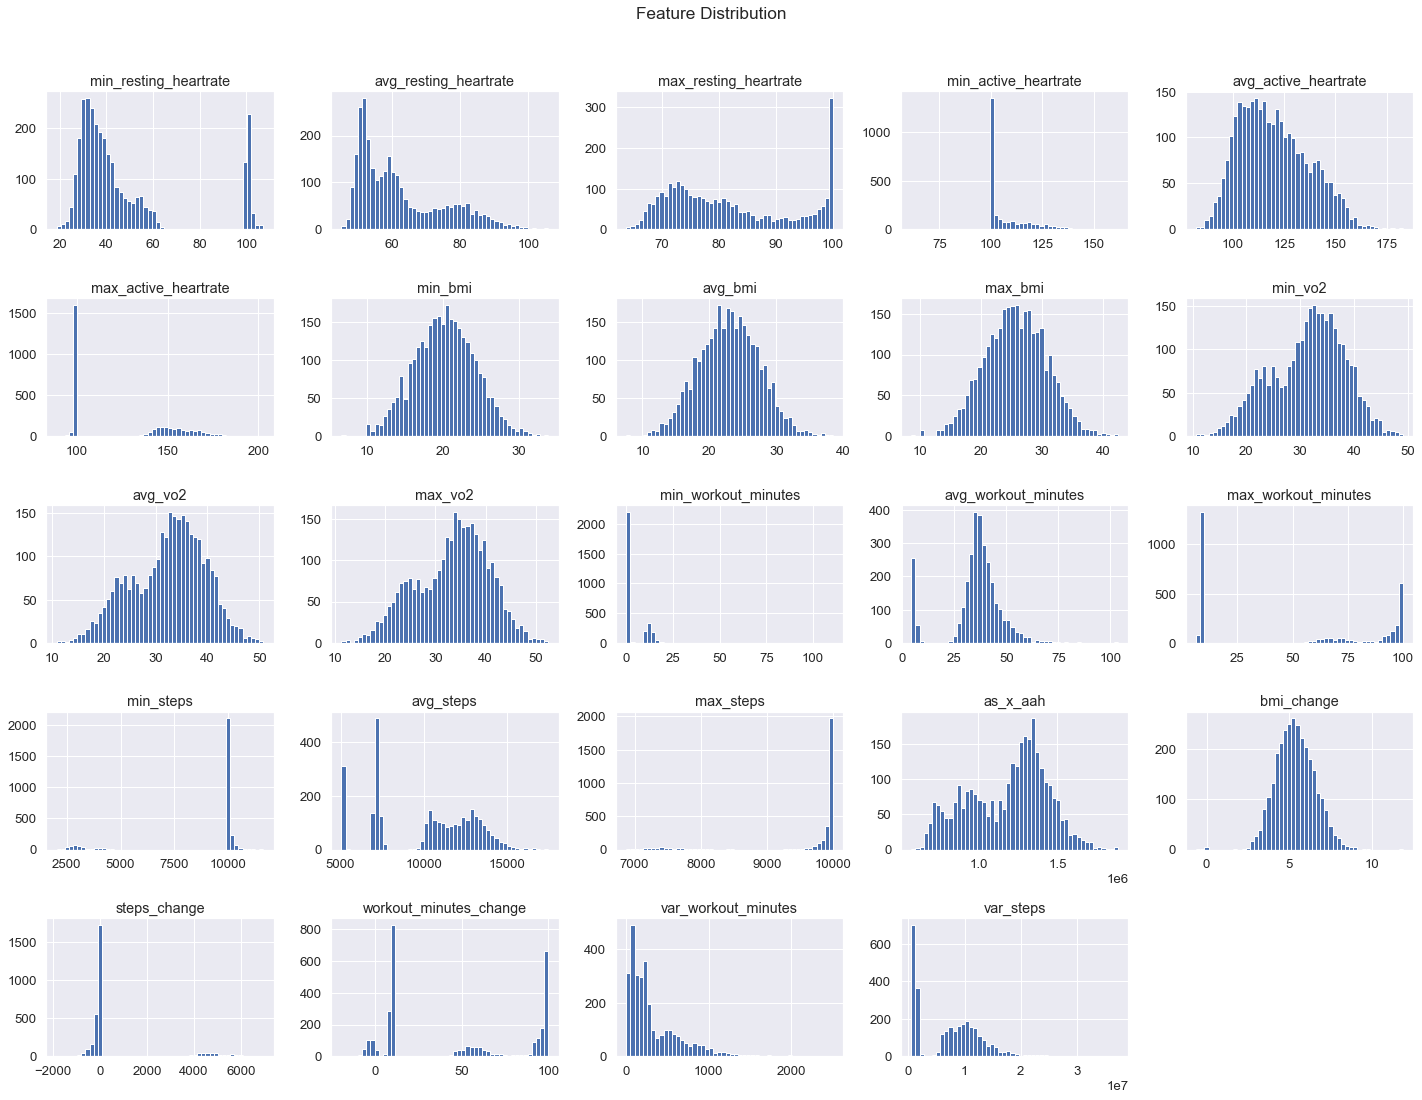

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

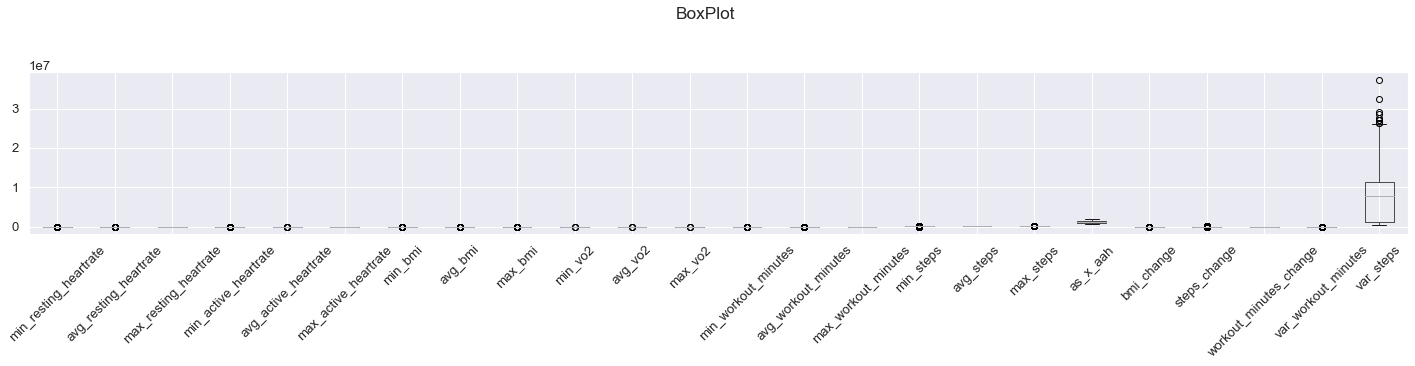

In [10]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation

In [11]:
df.corr()

,min_resting_heartrate,avg_resting_heartrate,max_resting_heartrate,min_active_heartrate,avg_active_heartrate,max_active_heartrate,min_bmi,avg_bmi,max_bmi,min_vo2,avg_vo2,max_vo2,min_workout_minutes,avg_workout_minutes,max_workout_minutes,min_steps,avg_steps,max_steps,as_x_aah,bmi_change,steps_change,workout_minutes_change,var_workout_minutes,var_steps
min_resting_heartrate,1.000000,0.917461,0.854134,0.667217,0.685939,0.662860,0.004606,0.004407,0.005231,-0.836145,-0.836072,-0.836194,0.404639,-0.314399,-0.109428,-0.392386,-0.675915,-0.436417,-0.558491,0.006808,0.353678,-0.185210,-0.392089,-0.624105
avg_resting_heartrate,0.917461,1.000000,0.956361,0.746998,0.806261,0.770858,0.143691,0.143967,0.144641,-0.941023,-0.941182,-0.941177,0.456477,-0.374457,-0.113541,-0.450795,-0.789815,-0.482597,-0.636476,0.133351,0.414373,-0.199211,-0.446750,-0.737699
max_resting_heartrate,0.854134,0.956361,1.000000,0.729690,0.813552,0.779423,0.243923,0.244050,0.243980,-0.915875,-0.916018,-0.915989,0.430242,-0.383801,-0.107461,-0.443951,-0.798452,-0.464749,-0.635460,0.219749,0.410635,-0.188200,-0.444801,-0.751011
min_active_heartrate,0.667217,0.746998,0.729690,1.000000,0.897848,0.863744,0.203636,0.206031,0.206733,-0.690376,-0.690766,-0.691182,0.339167,-0.441546,-0.180215,-0.530937,-0.735727,-0.555724,-0.552833,0.196097,0.483151,-0.240088,-0.420732,-0.658384
avg_active_heartrate,0.685939,0.806261,0.813552,0.897848,1.000000,0.903136,0.328193,0.328879,0.328140,-0.789265,-0.789361,-0.789392,0.393046,-0.393310,-0.078469,-0.493833,-0.817233,-0.512304,-0.546240,0.295113,0.453034,-0.152586,-0.379805,-0.751989
max_active_heartrate,0.662860,0.770858,0.779423,0.863744,0.903136,1.000000,0.344271,0.346955,0.347186,-0.736726,-0.737166,-0.737524,0.387681,-0.396427,-0.097887,-0.475613,-0.795581,-0.491636,-0.589896,0.322222,0.433046,-0.170619,-0.404445,-0.739518
min_bmi,0.004606,0.143691,0.243923,0.203636,0.328193,0.344271,1.000000,0.996161,0.993353,-0.127819,-0.128234,-0.127999,0.058726,-0.377739,-0.187682,-0.148489,-0.451878,-0.077989,-0.386946,0.871588,0.158651,-0.195553,-0.333318,-0.558348
avg_bmi,0.004407,0.143967,0.244050,0.206031,0.328879,0.346955,0.996161,1.000000,0.997329,-0.127559,-0.127956,-0.127699,0.059276,-0.377415,-0.186617,-0.148567,-0.453897,-0.076770,-0.389599,0.901418,0.158737,-0.194613,-0.334850,-0.560713
max_bmi,0.005231,0.144641,0.243980,0.206733,0.328140,0.347186,0.993353,0.997329,1.000000,-0.127197,-0.127615,-0.127373,0.060072,-0.378199,-0.186283,-0.148476,-0.454151,-0.077318,-0.390739,0.922224,0.158340,-0.194439,-0.335719,-0.561518
min_vo2,-0.836145,-0.941023,-0.915875,-0.690376,-0.789265,-0.736726,-0.127819,-0.127559,-0.127197,1.000000,0.999838,0.999687,-0.432426,0.305977,0.042028,0.418075,0.731315,0.443763,0.554314,-0.112374,-0.385950,0.124377,0.370864,0.662916


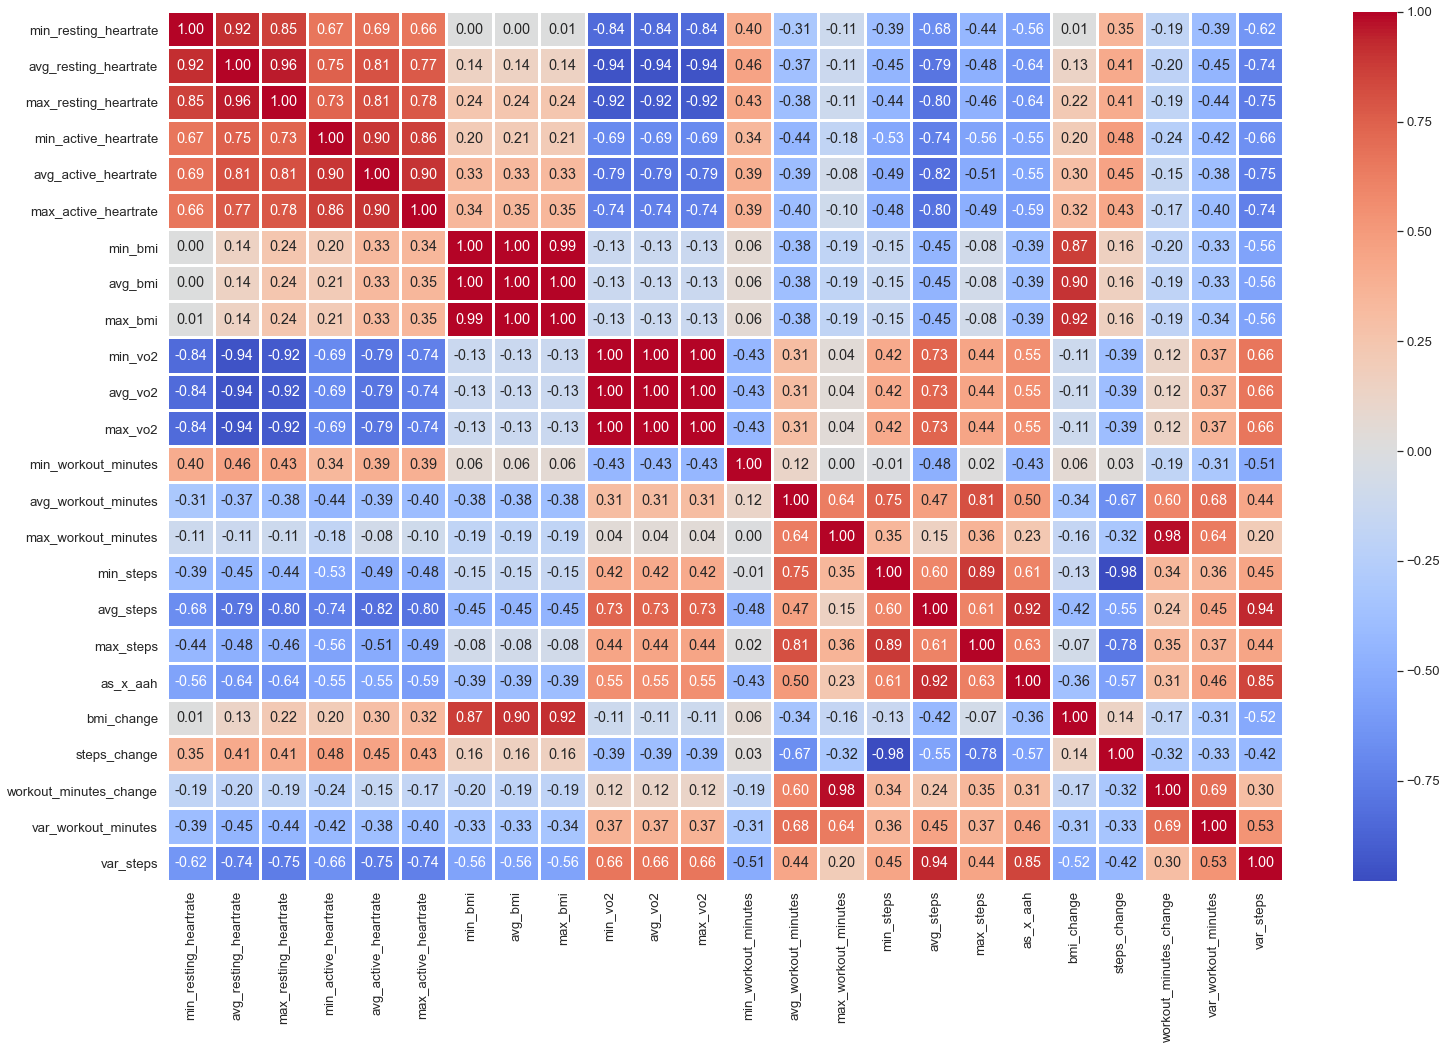

In [12]:
plt.figure(figsize=(25,16))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Data Preprocessing

### Drop unwanted features

In [13]:
df.columns

Index(['min_resting_heartrate', 'avg_resting_heartrate', 'max_resting_heartrate', 'min_active_heartrate', 'avg_active_heartrate', 'max_active_heartrate', 'min_bmi', 'avg_bmi', 'max_bmi', 'min_vo2', 'avg_vo2', 'max_vo2', 'min_workout_minutes', 'avg_workout_minutes', 'max_workout_minutes', 'min_steps', 'avg_steps', 'max_steps', 'as_x_aah', 'bmi_change', 'steps_change', 'workout_minutes_change', 'var_workout_minutes', 'var_steps', 'lifestyle'], dtype='object')

In [14]:
df = df[['avg_resting_heartrate','avg_active_heartrate','avg_vo2','avg_workout_minutes', 
         'avg_steps','as_x_aah', 'bmi_change', 'steps_change', 'workout_minutes_change', 
         'var_workout_minutes', 'var_steps', 'lifestyle','avg_bmi',]]

In [15]:
df.head()

,avg_resting_heartrate,avg_active_heartrate,avg_vo2,avg_workout_minutes,avg_steps,as_x_aah,bmi_change,steps_change,workout_minutes_change,var_workout_minutes,var_steps,lifestyle,avg_bmi
0,82.683797,139.434875,20.994012,5.502632,5171.495890,7.210869e+05,5.466266,5298,8.278820,1.904237,6.279071e+05,Sedentary,22.398064
1,77.732942,127.057153,25.527475,37.216702,7115.591781,9.040868e+05,5.298346,-416,54.006862,82.918618,1.316762e+06,Weight Trainer,25.150813
2,86.511629,147.315731,19.448407,45.000087,7257.693151,1.069172e+06,4.494924,-913,74.200450,137.295072,1.336600e+06,Weight Trainer,19.148256
3,77.550541,129.577004,21.401302,37.886069,7129.690411,9.238439e+05,5.573329,-150,56.716994,90.699736,1.212805e+06,Weight Trainer,24.240376
4,68.933106,136.502687,28.855230,32.241984,6958.378082,9.498373e+05,6.386137,-551,48.853753,70.656332,1.095015e+06,Weight Trainer,30.726596


### Treat Missing Values

In [16]:
df.isnull().sum()

avg_resting_heartrate     0
avg_active_heartrate      0
avg_vo2                   0
avg_workout_minutes       0
avg_steps                 0
as_x_aah                  0
bmi_change                0
steps_change              0
workout_minutes_change    0
var_workout_minutes       0
var_steps                 0
lifestyle                 0
avg_bmi                   0
dtype: int64

### Treat Duplicate Values

In [17]:
df.duplicated(keep='first').sum()

0

### Perform One-Hot Encoding

In [18]:
df2 = pd.get_dummies(df["lifestyle"])

In [19]:
df2

,Athlete,Cardio Enthusiast,Sedentary,Weight Trainer
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
2995,0,0,0,1
2996,0,0,0,1
2997,0,0,1,0
2998,0,0,1,0


In [20]:
df3 = pd.concat([df2,df],axis=1)

In [21]:
df3.head()

,Athlete,Cardio Enthusiast,Sedentary,Weight Trainer,avg_resting_heartrate,avg_active_heartrate,avg_vo2,avg_workout_minutes,avg_steps,as_x_aah,bmi_change,steps_change,workout_minutes_change,var_workout_minutes,var_steps,lifestyle,avg_bmi
0,0,0,1,0,82.683797,139.434875,20.994012,5.502632,5171.495890,7.210869e+05,5.466266,5298,8.278820,1.904237,6.279071e+05,Sedentary,22.398064
1,0,0,0,1,77.732942,127.057153,25.527475,37.216702,7115.591781,9.040868e+05,5.298346,-416,54.006862,82.918618,1.316762e+06,Weight Trainer,25.150813
2,0,0,0,1,86.511629,147.315731,19.448407,45.000087,7257.693151,1.069172e+06,4.494924,-913,74.200450,137.295072,1.336600e+06,Weight Trainer,19.148256
3,0,0,0,1,77.550541,129.577004,21.401302,37.886069,7129.690411,9.238439e+05,5.573329,-150,56.716994,90.699736,1.212805e+06,Weight Trainer,24.240376
4,0,0,0,1,68.933106,136.502687,28.855230,32.241984,6958.378082,9.498373e+05,6.386137,-551,48.853753,70.656332,1.095015e+06,Weight Trainer,30.726596


In [22]:
df3.drop(["lifestyle"],axis=1, inplace=True)

In [23]:
df3

,Athlete,Cardio Enthusiast,Sedentary,Weight Trainer,avg_resting_heartrate,avg_active_heartrate,avg_vo2,avg_workout_minutes,avg_steps,as_x_aah,bmi_change,steps_change,workout_minutes_change,var_workout_minutes,var_steps,avg_bmi
0,0,0,1,0,82.683797,139.434875,20.994012,5.502632,5171.495890,7.210869e+05,5.466266,5298,8.278820,1.904237,6.279071e+05,22.398064
1,0,0,0,1,77.732942,127.057153,25.527475,37.216702,7115.591781,9.040868e+05,5.298346,-416,54.006862,82.918618,1.316762e+06,25.150813
2,0,0,0,1,86.511629,147.315731,19.448407,45.000087,7257.693151,1.069172e+06,4.494924,-913,74.200450,137.295072,1.336600e+06,19.148256
3,0,0,0,1,77.550541,129.577004,21.401302,37.886069,7129.690411,9.238439e+05,5.573329,-150,56.716994,90.699736,1.212805e+06,24.240376
4,0,0,0,1,68.933106,136.502687,28.855230,32.241984,6958.378082,9.498373e+05,6.386137,-551,48.853753,70.656332,1.095015e+06,30.726596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,1,82.056086,140.614679,24.162064,41.550757,7283.430137,1.024157e+06,4.939479,-45,66.692962,105.680187,1.314433e+06,21.432227
2996,0,0,0,1,90.113362,144.578567,18.346046,40.459149,7110.720548,1.028058e+06,5.540079,-358,60.237497,96.136487,1.156895e+06,21.432304
2997,0,0,1,0,81.907737,148.378812,22.797690,5.838148,5153.890411,7.647281e+05,5.447098,5080,7.967938,2.021952,5.640107e+05,21.598411
2998,0,0,1,0,69.910868,140.814891,26.965661,5.176265,5167.194521,7.276179e+05,6.648573,3987,7.766478,1.650549,5.608619e+05,26.134180


### Create and save processed dataset

In [24]:
#df.to_csv("fs.csv",index=False)

### Train Test Split

In [25]:
df3.shape

(3000, 16)

In [26]:
X = df3.iloc[:,0:15]
y = df3.iloc[:,15]

### Train Test Split Cont'd

In [27]:
X.values, y.values

(array([[      0.        ,       0.        ,       1.        , ...,
               8.27881978,       1.90423669,  627907.0555    ],
        [      0.        ,       0.        ,       0.        , ...,
              54.00686244,      82.91861785, 1316762.225     ],
        [      0.        ,       0.        ,       0.        , ...,
              74.20045006,     137.2950719 , 1336599.676     ],
        ...,
        [      0.        ,       0.        ,       1.        , ...,
               7.96793822,       2.02195211,  564010.6894    ],
        [      0.        ,       0.        ,       1.        , ...,
               7.76647751,       1.65054854,  560861.9101    ],
        [      0.        ,       0.        ,       0.        , ...,
              -4.85712663,     177.1762729 , 1442987.776     ]]),
 array([22.39806365, 25.15081265, 19.148256  , ..., 21.59841078,
        26.13418039, 15.75133025]))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2550, 15), (450, 15), (2550,), (450,))

### Feature Scaling

In [30]:
X_train

,Athlete,Cardio Enthusiast,Sedentary,Weight Trainer,avg_resting_heartrate,avg_active_heartrate,avg_vo2,avg_workout_minutes,avg_steps,as_x_aah,bmi_change,steps_change,workout_minutes_change,var_workout_minutes,var_steps
422,0,1,0,0,55.379172,114.847288,34.151571,30.581632,12625.063010,1.449954e+06,4.755765,-56,9.856415,191.879950,1.020000e+07
838,1,0,0,0,56.996730,116.005573,36.415269,44.377966,11114.764380,1.289375e+06,4.754315,-12,97.977121,644.092518,8.049741e+06
1735,1,0,0,0,51.016680,91.966741,38.392252,50.937465,11658.246580,1.072171e+06,4.377825,-26,99.796459,1002.817386,1.120000e+07
746,1,0,0,0,58.283746,123.242833,34.513867,43.639030,10835.591780,1.335409e+06,5.948916,-12,98.274449,665.741503,6.949809e+06
900,1,0,0,0,61.116570,125.025656,30.988530,38.422210,10340.331510,1.292807e+06,6.508950,-57,95.694378,647.253906,7.462380e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,0,0,0,54.774949,128.546780,35.797254,48.140014,11314.109590,1.454392e+06,5.259825,-14,99.662440,733.118545,8.778585e+06
835,0,0,0,1,64.499411,116.193187,30.484438,35.647839,7112.860274,8.264659e+05,7.471729,-96,-1.820479,87.675349,1.288934e+06
1653,1,0,0,0,50.770937,112.290051,40.978260,44.896810,11068.243840,1.242854e+06,4.879923,-2,98.481833,786.978716,9.857506e+06
2607,0,0,1,0,76.451872,129.705381,24.945521,5.306249,5139.671233,6.666430e+05,4.651960,4150,6.630813,1.948641,5.942122e+05


In [31]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)

In [33]:
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled

array([[-0.62179029,  1.33788428, -0.34767675, ..., -0.90502613,
        -0.40387176,  0.50660908],
       [ 1.60825927, -0.7474488 , -0.34767675, ...,  1.22052102,
         0.97466982,  0.12475119],
       [ 1.60825927, -0.7474488 , -0.34767675, ...,  1.26440501,
         2.06822002,  0.68419601],
       ...,
       [ 1.60825927, -0.7474488 , -0.34767675, ...,  1.2326951 ,
         1.41024941,  0.44578663],
       [-0.62179029, -0.7474488 ,  2.87623491, ..., -0.98283039,
        -0.9828654 , -1.1992533 ],
       [ 1.60825927, -0.7474488 , -0.34767675, ...,  1.13566521,
         0.49722584, -0.16471405]])

In [35]:
X_test_scaled

array([[ 1.60825927, -0.7474488 , -0.34767675, ...,  1.24260812,
         1.2449029 ,  0.35440548],
       [-0.62179029, -0.7474488 , -0.34767675, ...,  0.30443401,
        -0.69727715, -1.08681185],
       [-0.62179029,  1.33788428, -0.34767675, ..., -0.90375998,
        -0.35515854,  0.64867863],
       ...,
       [-0.62179029,  1.33788428, -0.34767675, ...,  1.24200884,
         0.5319391 ,  2.61989356],
       [-0.62179029,  1.33788428, -0.34767675, ..., -0.90549343,
        -0.4045936 ,  0.55988516],
       [-0.62179029,  1.33788428, -0.34767675, ..., -0.90636902,
        -0.360787  ,  0.55988516]])

### LASSO Method

In [36]:
lassomodel = Lasso(alpha=0.01, random_state=0)

In [37]:
lassomodel.fit(X_train_scaled, y_train)

Lasso(alpha=0.01, random_state=0)

In [38]:
lassopred = lassomodel.predict(X_test_scaled)

In [39]:
lassopred[:10]

array([22.86051629, 23.46495053, 23.51140409, 21.27587223, 28.36387104,
       16.06769494, 26.45148022, 27.14116163, 20.44977603, 26.11809244])

In [40]:
y_test[:10]

311     22.830853
1025    22.769519
1587    21.664172
2941    21.017009
2980    30.162712
2078    16.287174
2281    25.272133
720     27.621048
1537    19.487015
2493    26.842327
Name: avg_bmi, dtype: float64

In [41]:
r2_score(y_test,lassopred)

0.9318810409884009

In [42]:
lassomodel.score(X_test_scaled,y_test)

0.9318810409884009

In [43]:
lassomodel.coef_

array([ 0.94873627, -0.79866611, -4.10817101,  0.        , -1.93463247,
        0.25807256, -0.63736368, -4.38305878, -2.02806323,  0.        ,
        1.75696399,  0.08237675, -0.17059104,  0.21577894, -0.        ])

In [44]:
pd.DataFrame(list(zip(lassomodel.coef_, X.columns)), columns=['coef', 'feature_name']).sort_values('coef', ascending=False)

,coef,feature_name
10,1.756964,bmi_change
0,0.948736,Athlete
5,0.258073,avg_active_heartrate
13,0.215779,var_workout_minutes
11,0.082377,steps_change
3,0.000000,Weight Trainer
9,0.000000,as_x_aah
14,-0.000000,var_steps
12,-0.170591,workout_minutes_change
6,-0.637364,avg_vo2
